In [25]:
from library.models import *
from library.code import *
from library.utilities import *

In [26]:
# Importation données d'entraînement
Str0 = pd.read_csv('data/Xtr0.csv')
Str1 = pd.read_csv('data/Xtr1.csv')
Str2 = pd.read_csv('data/Xtr2.csv')
Ste0 = pd.read_csv('data/Xte0.csv')
Ste1 = pd.read_csv('data/Xte1.csv')
Ste2 = pd.read_csv('data/Xte2.csv')

In [27]:
Str = [Str0, Str1, Str2]
Ste = [Ste0, Ste1, Ste2]
S = [list(Str[i].seq.values)+list(Ste[i].seq.values) for i in range(3)] # Listes des séquences pour chaque échantillon

## Calcul des noyaux

In [28]:
# Fonctions pour transformer les séquences en vecteurs :

# encode(seqs, size=2) -> Extraction des sous-chaînes de longueur size et donne les vecteurs des fréquences d'apparition
# encode(seqs, size=3, size_sent=3) -> Pareil sur des chaînes de size_sent mots de size caractères
# encode(seqs, size=3, tfidf=True) -> Valeurs de la TF-IDF plutôt que les fréquences simples

# seq_to_num(seqs,to='aa',OH=True,size_sent=1) -> Encode les séquences en les "traduisant" en suites numériques correspondant aux codons qu'elles contiennent (avec encodage One-Hot)
# to='aa' pour la traduction en acides aminés
# to=dict pour utiliser un dictionnaire associant un entier à chaque sous-séquence possible

# Output : Matrice sparse (scipy.sparse.csr_matrix)

In [29]:
# Fonctions pour calculer les noyaux :

# gauss_kernel(X, gamma) -> Renvoie le noyau gaussien sur les vecteurs de X (matrice sparse)
# ps(X) -> Noyau linéaire (produits scalaires des vecteurs de X)

# Output : Matrice dense symétrique de taille (X.shape[0]*X.shape[0])

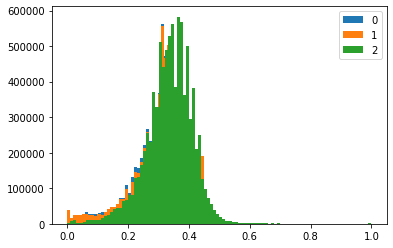

In [30]:
# Exemple : Noyau spectral gaussien sur sous-chaînes de 3 mots de 2 caractères
Kg23 = [gauss_kernel(encode(seqs,size=2,size_sent=3),gamma=0.005) for seqs in S]
plt.hist(Kg23[0].flatten(),bins=100,label='0')
plt.hist(Kg23[1].flatten(),bins=100,label='1')
plt.hist(Kg23[2].flatten(),bins=100,label='2')
plt.legend(loc='best')
plt.show()

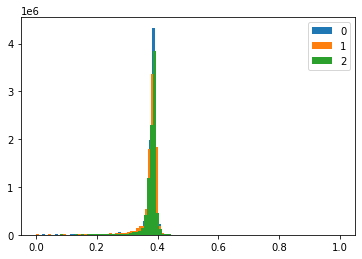

In [31]:
# Exemple : Noyau spectral gaussien sur sous-chaînes de 7 caractères
Kg7 = [gauss_kernel(encode(seqs,size=7),gamma=0.005) for seqs in S]
plt.hist(Kg7[0].flatten(),bins=100,label='0')
plt.hist(Kg7[1].flatten(),bins=100,label='1')
plt.hist(Kg7[2].flatten(),bins=100,label='2')
plt.legend(loc='best')
plt.show()

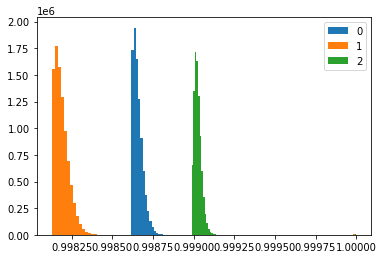

In [32]:
# Exemple : Noyau spectral gaussien sur la traduction en codons avec Encodage One-Hot
Ktradcod = [gauss_kernel(seq_to_num(seqs,to=codons_to_num)) for seqs in S]
plt.hist(Ktradcod[0].flatten(),bins=100,label='0')
plt.hist(Ktradcod[1].flatten(),bins=100,label='1')
plt.hist(Ktradcod[2].flatten(),bins=100,label='2')
plt.legend(loc='best')
plt.show()

## Évaluation des noyaux

In [33]:
# Fonction pour évaluer les noyaux sur les différents échantillons et selon la méthode souhaitée
# evalModel(kernels,model,datasets,n_iter,lbd_values)
# kernels = dictionnaire donnant les noyaux à tester (associe nom de noyau à la variable le contenant)
# model = 'KRR' ou 'SVM'
# datasets = liste des échantillons à tester ([0], [0,2], [0,1,2], ...)
# n_iter = nombre d'itérations de validation croisée à effectuer (le SVM est plus lent donc j'en faisais 3 seulement)
# lbd_values = valeurs de lambda à tester

In [10]:
evalModel(kernels={'Spectral 7':Kg7}, model='KRR',datasets=[0,1,2],n_iter=10,lbd_values=0.000005*10**np.arange(5))


Dataset  0

Spectral 7
lbd = 5e-06
Averaged AUC = 0.6979941945883955  -- Averaged ACC = [0.5213  0.64195 0.64125 0.6427 ] (seuils : opt_thr, 0.5, MOY, MED)
lbd = 5e-05
Averaged AUC = 0.6949668462133431  -- Averaged ACC = [0.53765 0.6384  0.63615 0.6366 ] (seuils : opt_thr, 0.5, MOY, MED)
lbd = 0.0005
Averaged AUC = 0.70965836519669  -- Averaged ACC = [0.61915 0.64445 0.64265 0.6477 ] (seuils : opt_thr, 0.5, MOY, MED)
lbd = 0.005
Averaged AUC = 0.7075749588892255  -- Averaged ACC = [0.6434 0.6373 0.6214 0.6445] (seuils : opt_thr, 0.5, MOY, MED)
lbd = 0.05
Averaged AUC = 0.6900178448727963  -- Averaged ACC = [0.6291  0.5256  0.60925 0.6303 ] (seuils : opt_thr, 0.5, MOY, MED)

AUC Max = 0.70965836519669  --  lbd = 0.0005 


Dataset  1

Spectral 7
lbd = 5e-06
Averaged AUC = 0.680386269116195  -- Averaged ACC = [0.5024  0.62655 0.62605 0.6259 ] (seuils : opt_thr, 0.5, MOY, MED)
lbd = 5e-05
Averaged AUC = 0.6877175962341829  -- Averaged ACC = [0.5123  0.63175 0.6323  0.6324 ] (seuils : opt_

([[0,
   'Spectral 7',
   0.70965836519669,
   0.0005,
   array([0.70965837, 0.99963176, 0.61915   , 0.9953    , 0.4614397 ,
          0.4614397 , 0.90858854, 0.35182872, 0.64445   , 0.64265   ,
          0.6477    ])],
  [1,
   'Spectral 7',
   0.6950678980852508,
   0.005,
   array([0.6950679 , 0.99838527, 0.6356    , 0.9915125 , 0.50165762,
          0.50165762, 0.63673297, 0.63486796, 0.62535   , 0.63685   ,
          0.6363    ])],
  [2,
   'Spectral 7',
   0.8288682487470358,
   0.0005,
   array([0.82886825, 0.99963472, 0.7122    , 0.9974875 , 0.48536509,
          0.48536509, 0.8947301 , 0.52925637, 0.73445   , 0.73445   ,
          0.742     ])]],
 [[(array([[-0.91275645],
           [ 0.70091091],
           [ 0.76374105],
           ...,
           [-0.79062059],
           [-0.20656318],
           [-0.65853006]]), 0),
   array([   0,    1,    3, ..., 1997, 1998, 1999]),
   0.4528336405629961,
   0.7594246404002502,
   array([0.6525, 0.7   , 0.675 , 0.7025])],
  [(array([[-0

In [12]:
evalModel(kernels={'Traduction codons OH':Ktradcod}, model='KRR',datasets=[0],n_iter=10,lbd_values=0.00005*10**np.arange(4))


Dataset  0

Traduction codons OH
lbd = 5e-05
Averaged AUC = 0.704070382182545  -- Averaged ACC = [0.6393  0.58805 0.6407  0.6429 ] (seuils : opt_thr, 0.5, MOY, MED)
lbd = 0.0005
Averaged AUC = 0.7010233253085346  -- Averaged ACC = [0.63775 0.519   0.635   0.6407 ] (seuils : opt_thr, 0.5, MOY, MED)
lbd = 0.005
Averaged AUC = 0.6992831925678193  -- Averaged ACC = [0.63775 0.519   0.6347  0.6397 ] (seuils : opt_thr, 0.5, MOY, MED)
lbd = 0.05
Averaged AUC = 0.7001396990572637  -- Averaged ACC = [0.63495 0.519   0.6359  0.6389 ] (seuils : opt_thr, 0.5, MOY, MED)

AUC Max = 0.704070382182545  --  lbd = 5e-05 



([[0,
   'Traduction codons OH',
   0.704070382182545,
   5e-05,
   array([0.70407038, 0.90346894, 0.6393    , 0.8279125 , 0.49298412,
          0.49298412, 0.6136939 , 0.66411666, 0.58805   , 0.6407    ,
          0.6429    ])]],
 [[(array([[ 12.61356585],
           [ 12.782848  ],
           [ 12.69375619],
           ...,
           [-12.05040106],
           [-10.36033624],
           [-11.96368013]]), 0),
   array([   1,    2,    3, ..., 1995, 1998, 1999]),
   0.493705127029179,
   0.7429152848959903,
   array([0.68 , 0.65 , 0.68 , 0.675])]])

In [13]:
evalModel(kernels={'Spectral 3-2':Kg23}, model='KRR',datasets=[1],n_iter=10,lbd_values=0.00005*10**np.arange(4))


Dataset  1

Spectral 3-2
lbd = 5e-05
Averaged AUC = 0.6898464998430027  -- Averaged ACC = [0.57235 0.64055 0.6395  0.6395 ] (seuils : opt_thr, 0.5, MOY, MED)
lbd = 0.0005
Averaged AUC = 0.690957385207619  -- Averaged ACC = [0.63495 0.6369  0.6364  0.6366 ] (seuils : opt_thr, 0.5, MOY, MED)
lbd = 0.005
Averaged AUC = 0.6760600447180545  -- Averaged ACC = [0.6246  0.62475 0.624   0.6241 ] (seuils : opt_thr, 0.5, MOY, MED)
lbd = 0.05
Averaged AUC = 0.6553514484645959  -- Averaged ACC = [0.6094  0.59325 0.61045 0.6107 ] (seuils : opt_thr, 0.5, MOY, MED)

AUC Max = 0.690957385207619  --  lbd = 0.0005 



([[1,
   'Spectral 3-2',
   0.690957385207619,
   0.0005,
   array([0.69095739, 0.98814672, 0.63495   , 0.9470125 , 0.50427056,
          0.50427056, 0.62179045, 0.6484111 , 0.6369    , 0.6364    ,
          0.6366    ])]],
 [[(array([[-0.34658933],
           [-0.51957531],
           [ 0.40492297],
           ...,
           [ 0.49200317],
           [ 1.1114018 ],
           [ 0.78837197]]), 0),
   array([   0,    1,    3, ..., 1997, 1998, 1999]),
   0.5009433331201291,
   0.7583758375837584,
   array([0.6825, 0.6825, 0.6825, 0.68  ])]])

## Entraînement final et prédiction

Fonctions train et train_check pour l'entraînement

train(K, Y, model, params={'lbd': 0.005})

train_check(K, Y, model, params={'lbd': 0.005})

K est le noyau, Y les labels, model ('SVM' ou 'KRR') et lbd la valeur de lambda

train_check permet d'effectuer en parallèle une validation croisée et de tester sur un jeu de validation (20% du jeu d'entraînement) pour vérifier que ce modèle et ce noyau performent bien.

Retourne les paramètres du modèle entraîné : tuple (w,b) contenant le vecteur des poids w et la constante scalaire (biais/intercept) b

In [34]:
res01, _ = train_check(Kg7[0][:2000,:][:,:2000],Y[:2000],'KRR',params={'lbd':0.0005})

Averaged AUC = 0.7155680646179636  -- Averaged ACC = [0.6215 0.6575 0.6425 0.657 ] (seuils : opt_thr, 0.5, MOY, MED)
Averaged threshold = 0.4598966431649859
Best AUC = 0.7440368357487922  ( threshold = 0.4559814524774653 )
Best ACC = [0.62   0.6875 0.665  0.69  ]


Fonction predict pour la prédiction

predict(K, res, threshold=0.5)

K : les noyaux "test-entraînement"

res : les paramètres du modèle entraîné (w,b)

threshold : le seuil pour choisir la classe

Retourne les probabilités d'appartenance à la classe 1 (sorties du modèle auxquelles on applique la fonction logit) et les classes (en utilisant le seuil threshold)

In [35]:
preds01,cls01 = predict(Kg7[0][2000:,:][:,:2000],res01,threshold=0.5)

In [36]:
res02, _ = train_check(Ktradcod[0][:2000,:][:,:2000],Y[:2000],'KRR',params={'lbd':0.0005})
preds02,cls02 = predict(Ktradcod[0][2000:,:][:,:2000],res01,threshold=0.5)

Averaged AUC = 0.7019280774628839  -- Averaged ACC = [0.633  0.519  0.6325 0.637 ] (seuils : opt_thr, 0.5, MOY, MED)
Averaged threshold = 0.49082109723428335
Best AUC = 0.7358808159983922  ( threshold = 0.4929071766914404 )
Best ACC = [0.67  0.535 0.65  0.66 ]


Fonction de sélection du meilleur modèle puis prédiction

cv_predict2

Cette fonction réalise plusieurs validations croisées et conserve le modèle ayant le mieux performé (paramètres et jeu d'entraînement) puis réalise la prédiction en utilisant ce modèle.

In [38]:
K_train = Kg7[0][:2000,:][:,:2000]
K_test = Kg7[0][2000:,:][:,:2000]
preds03,cls03,_ = cv_predict2(K_train, K_test, Y[:2000], 'KRR', {'lbd':0.0005}, n_iter=5,show=1)


Averaged AUC = 0.7105688481281004
Averaged threshold = 0.4607884262880343
Best AUC = 0.7573189329733243  ( threshold = 0.456837548939085 )


Combinaison des prédictions

In [39]:
vals = combine_preds(preds=[preds01,preds02],weights=[0.5,0.5])

In [40]:
print(vals)  
# Colonnes contenant : 
# - moyenne des "probabilités" de chaque modèle (renormalisées dans [-1,1] autour de leur médiane)
# - écart-type des prédictions de chaque modèle
# - nombre de "votes" pour chaque classe (normé pour être dans [-1,1]) (1 si tous les votes pour classe 1, -1 si tous votes pour 0)

[[ 0.29209323  0.22446192  1.          1.        ]
 [ 0.4160146   0.04955208  1.          1.        ]
 [ 0.03131101  0.24013884  0.          1.        ]
 ...
 [-0.12122759  0.10488754 -1.          0.        ]
 [ 0.01430656  0.14992847  0.          1.        ]
 [-0.11965672  0.04511851 -1.          0.        ]]


### Et encore de nombreuses autres fonctions à explorer dans le code que j'ai fourni !

Exemple : le calcul optimisé du substring kernel
(et accéléré avec numba)

In [22]:
from library.substringKernel import *

In [30]:
t = time()
K = np.zeros([3000,3000])
L = []
ys_np = np.array([np.array(list(s)) for s in S[0]])  # toutes les séquences
for i,s in enumerate(S[0]):
  x_np = np.array(list(s))  # Une séquence s
  deltas = (x_np[:,None,None]==ys_np.T)
  K[i,i:3000] = substringKernel2(x_np,ys_np[i:],deltas[:,:,i:],k=3,lbd=0.4) # retourne les noyaux entre la séquence s et chacune des autres séquences situées au-dessus de la diagonale
  if (i%100 == 0):
    print(str(i+1)+'/3000  -- '+str(time()-t)+' s')

1/3000  -- 1.4931902885437012 s
101/3000  -- 159.7536609172821 s
201/3000  -- 310.8577287197113 s
301/3000  -- 458.01159715652466 s
401/3000  -- 603.0583920478821 s


KeyboardInterrupt: ignored

In [36]:
# Extrait de la matrice (on la complètera en symétrisant)
print(K[:6,:6])

[[12.63115777  8.81251402 10.02895847 10.73901852 10.39059496 12.61705674]
 [ 0.         15.12940444 11.25366682 11.46742559  9.99994249  8.91782011]
 [ 0.          0.         14.99240398 13.62358858 11.73112503  8.18157823]
 [ 0.          0.          0.         13.85648829 11.6638469   8.84120523]
 [ 0.          0.          0.          0.         11.77129451  9.94872315]
 [ 0.          0.          0.          0.          0.         15.11000575]]
